In [1]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4) # Size of the plots

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Today we will look at all the posts from the political parties in Germany and to compare between posts that were sponsored (ads) and those that were not sponsored (normal posts)

In [2]:
ads.df <- read.csv("facebook_advertising.csv")
head(ads.df)

party,post_id,shares,likes,total_interactions,ad_group
AfD,540404695989874_2439949619368696,708,6109,7380,not sponsored
AfD,540404695989874_2438363652860626,1278,3468,5919,not sponsored
AfD,540404695989874_2444971565533168,2630,1021,7453,not sponsored
AfD,540404695989874_2441894709174187,2539,2034,6753,not sponsored
AfD,540404695989874_2444885268875131,2751,843,8789,not sponsored
AfD,540404695989874_2445023578861300,1384,1184,4936,not sponsored


In [3]:
summary(ads.df)

   party                                  post_id          shares        
 AfD  :3531   100001812953461_2381841601846165:    1   Min.   :    0.00  
 CDU  :1459   100004611013509_2314312881932371:    1   1st Qu.:    3.00  
 CSU  : 328   100028034795100_2380442865319372:    1   Median :   10.00  
 FDP  :1952   100035206962284_2342562292440763:    1   Mean   :   79.69  
 Grüne:1385   100035808759947_2379303195433339:    1   3rd Qu.:   30.00  
 Linke:1268   10155783405575683:9:0           :    1   Max.   :11531.00  
 SPD  :1573   (Other)                         :11490                     
     likes         total_interactions          ad_group    
 Min.   :    0.0   Min.   :    0.0    high         :  166  
 1st Qu.:   22.0   1st Qu.:   34.0    low          :  213  
 Median :   46.0   Median :   75.0    middle       :  143  
 Mean   :  170.2   Mean   :  358.2    not sponsored:10974  
 3rd Qu.:  107.0   3rd Qu.:  195.0                         
 Max.   :29526.0   Max.   :39568.0              

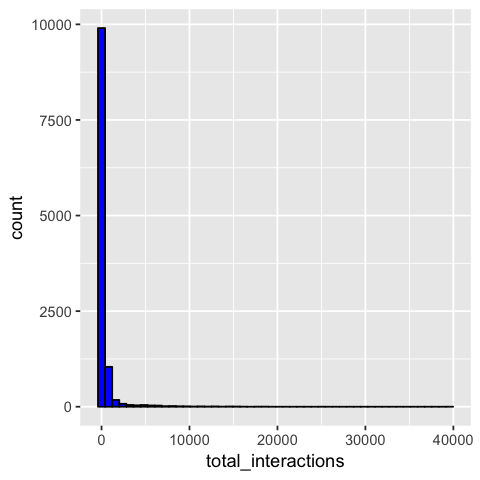

In [4]:
ggplot(data=ads.df, aes(total_interactions)) + geom_histogram(bins=50, color="black", fill="blue") 

# <font color='#FD7C6E'> Wilcoxon rank sum test </font> 

**We are going to compare the likes between political parties:**

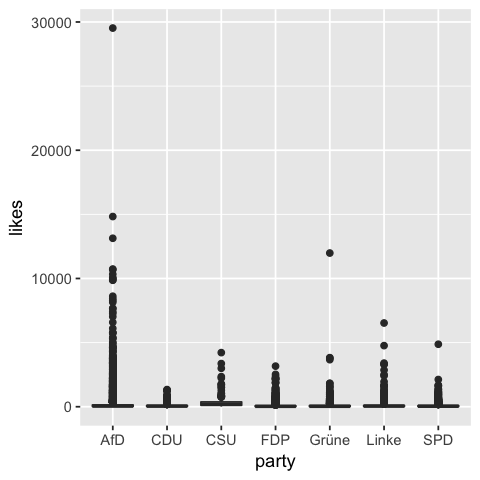

In [5]:
ggplot(data=ads.df, aes(x=party, y=likes)) + geom_boxplot()

## Activity 1: Select the likes of all the posts from CDU and assign it to group 1, select the likes of all the posts form FDP and assign it to group 2

In [6]:
group1 <- ads.df[ads.df$party=="CDU", ]$likes
group2 <- ads.df[ads.df$party=="FDP", ]$likes

## Activity 2: What are the mean for CDU and FDP likes?

In [7]:
mean(group1)
mean(group2)

[1] 85.88074

[1] 98.0333

In [8]:
wilcox.test(group1, group2 , alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  group1 and group2
W = 1708482, p-value = 1
alternative hypothesis: true location shift is less than 0


## Activity 3: Compare the CSU with the rest of the parties, with which one is there a significant difference?

# <font color='#FD7C6E'> Kruskal-Wallis test </font>

**Now we are going to compare between non sponsored posts, low sponsored, middle sponsored and highly sponsored posts**

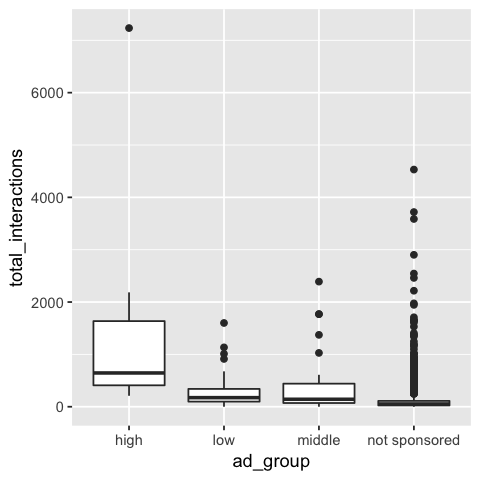

In [9]:
SPD <- ads.df[ads.df$party=="SPD", ]
ggplot(data=SPD, aes(x=ad_group, y=total_interactions)) + geom_boxplot()

In [10]:
kruskal.test(total_interactions ~ ad_group, data = SPD)


	Kruskal-Wallis rank sum test

data:  total_interactions by ad_group
Kruskal-Wallis chi-squared = 91.823, df = 3, p-value < 2.2e-16


In [11]:
pairwise.wilcox.test(SPD$total_interactions, SPD$ad_group, p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”


	Pairwise comparisons using Wilcoxon rank sum test 

data:  SPD$total_interactions and SPD$ad_group 

              high    low     middle
low           2.5e-05 -       -     
middle        0.0019  0.6278  -     
not sponsored 1.4e-08 1.5e-11 0.0013

P value adjustment method: BH 

## Activity 4: Repeat the Tests for the other parties, which parties did not achieve more interactions with their payed posts?

# <font color='#FD7C6E'> Categorical Data: Goodness of Fit </font>

We are going to evaluate a dataset of teachers during the Nazi times.

* **Religion**     
* **Cohort**  
* **Residence** 
* **Gender**  
* **Membership**    
* **Count**

In [12]:
nazi.df <- read.csv("nazi.csv")
head(nazi.df)

Religion,Cohort,Residence,Gender,Membership
Protestant,Empire,Rural,Male,Yes
Protestant,Empire,Rural,Male,Yes
Protestant,Empire,Rural,Male,Yes
Protestant,Empire,Rural,Male,Yes
Protestant,Empire,Rural,Male,Yes
Protestant,Empire,Rural,Male,Yes


## Activity 5: Create a dataframe with only Nazi members, and another with non Nazi members

In [13]:
members <- nazi.df[nazi.df$Membership=="Yes",]
non.members <- nazi.df[nazi.df$Membership=="No",]

**table( )** counts the number of occurrances for each category

In [14]:
table(members$Religion)


  Catholic       None Protestant 
       787        327       1970 

In [15]:
table(non.members$Religion)


  Catholic       None Protestant 
      3327       2882       4273 

**chisq.test( )** with one variable calculates the goodness of fit test

In [16]:
chisq.test(table(members$Religion))


	Chi-squared test for given probabilities

data:  table(members$Religion)
X-squared = 1397.7, df = 2, p-value < 2.2e-16


In [17]:
chisq.test(table(non.members$Religion))


	Chi-squared test for given probabilities

data:  table(non.members$Religion)
X-squared = 288.86, df = 2, p-value < 2.2e-16


In [18]:
table(members$Residence)


Rural Urban 
 1530  1554 

In [19]:
chisq.test(table(members$Residence))


	Chi-squared test for given probabilities

data:  table(members$Residence)
X-squared = 0.18677, df = 1, p-value = 0.6656


You can give a vector of proportions you hipothezise its correct. Imagine we new that from all the Nazi members 15% were women and 85% men. Is it the same proportions for teachers?

In [20]:
table(members$Gender)


Female   Male 
   491   2593 

In [21]:
chisq.test(table(members$Gender), p= c(0.15,0.85))


	Chi-squared test for given probabilities

data:  table(members$Gender)
X-squared = 2.0512, df = 1, p-value = 0.1521


# <font color='#FD7C6E'> Categorical Data: Independence Test </font>

**table( )** with two variables counts the number of occurrances for each category an creates a contingency table

In [22]:
table(nazi.df$Membership, nazi.df$Religion)

     
      Catholic None Protestant
  No      3327 2882       4273
  Yes      787  327       1970

In [23]:
chisq.test(table(nazi.df$Membership, nazi.df$Religion))


	Pearson's Chi-squared test

data:  table(nazi.df$Membership, nazi.df$Religion)
X-squared = 594.46, df = 2, p-value < 2.2e-16


In [24]:
table(nazi.df$Membership, nazi.df$Gender)

     
      Female Male
  No    4636 5846
  Yes    491 2593

In [25]:
chisq.test(table(nazi.df$Membership, nazi.df$Gender))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(nazi.df$Membership, nazi.df$Gender)
X-squared = 810.98, df = 1, p-value < 2.2e-16
